In [1]:
import numpy as np
import functools

import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [2]:
N = 10
SEED = 1234
SCALE = 0.25

np.random.seed(SEED)

def true_fun(x):
  return np.sin(2 * np.pi * x)

def generate_noisy_data(x, scale=SCALE):
  y = true_fun(x) + np.random.normal(scale=scale, size=x.shape)
  return y

x_plot = np.arange(0, 1.01, 0.01)
y_plot = true_fun(x_plot)

# points with noise, will act as train data
x_train = np.linspace(0, 1, N)
y_train = generate_noisy_data(x_train)

In [ ]:
plt.plot(x_plot, y_plot, color='lime', label="$\\sin(2\\pi x)$")
plt.scatter(x_train, y_train, marker='o', color='blue', label="train")
plt.hlines(y=y_train[3], xmin=-2, xmax=x_train[3], linewidth=1, linestyle='--', color = 'k')
plt.vlines(x=x_train[3], ymin=-2, ymax=y_train[3], linewidth=1, linestyle='--', color = 'k')

plt.text(-0.1, y_train[3], "$y_{train}$", fontsize=15)
plt.text(x_train[3] - 0.01, -1.7, "$x_{train}$", fontsize=15)
plt.yticks( [-1.5, 0.0, 1.5] )
plt.xticks( [0.0, 0.5, 1.0] )
plt.xlim(-0.05, 1.05)
plt.ylim(-1.5, 1.5)
plt.legend();

In [4]:
def transform_features(X, m):
    # """ Create a polynomial of specified degrees """
    return (X.reshape(-1,1) * np.ones((1,m+1))) ** np.arange(m+1) 

# examples of creating the polynomial features
features_m_0 = transform_features(x_train, m=0)
features_m_1 = transform_features(x_train, m=1)
features_m_3 = transform_features(x_train, m=3)
features_m_9 = transform_features(x_train, m=9)

In [ ]:
def multiple_regression_fit(features, y_train):
    A_t = features.T @ features 
    weight_vector = np.linalg.solve(A_t, features.T @ y_train)
    return weight_vector

def multiple_regression_predict(features, weight_vector):
    return np.dot(features, weight_vector)

NameError: name 'generate_noisy_data' is not defined

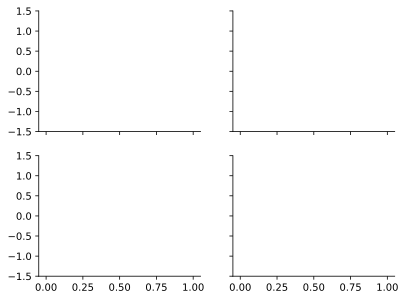

In [2]:
# we will invoke above fit & predict methods in a loop for all
# the polynomials

# test data
# x that we used to draw out sin function will act as the test data

def regress(m, x, y):
    poly_train_features = transform_features(x, m=m)
    return multiple_regression_fit(poly_train_features, y)
    
def predict(m, x, weight_vector):
    poly_test_features = transform_features(x, m=m)
    return multiple_regression_predict(poly_test_features, weight_vector)

def regress_and_predict(m, x_train, y_train, x_test):
    weight_vector = regress(m, x_train, y_train)
    return predict(m, x_test, weight_vector)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

plt.xlim(-0.05, 1.05)
plt.ylim(-1.5, 1.5)

def plot(m, x, y_predict, ax):
    # true function
    ax.plot(x_plot, y_plot, color='lime', label="$\\sin(2\\pi x)$")

    # training data
    ax.scatter(x_train, y_train, marker='o', color='blue', label="Train")

    # Show the poly degree
    ax.text(0.65, 0.8, f"M={m}")

    # finally the predictions
    ax.plot(x, y_predict, color='red', label="Test")


x_test = np.linspace(0, 1, 100)
y_test = generate_noisy_data(x_test)

partial_rp = functools.partial(regress_and_predict, 
                        x_train=x_train, 
                        y_train=y_train, 
                        x_test=x_test)

results = list(map(partial_rp, [0,1,3,9]))

plot(m=0, x=x_test, y_predict=results[0], ax=ax[0][0])
plot(m=1, x=x_test, y_predict=results[1], ax=ax[0][1])
plot(m=3, x=x_test, y_predict=results[2], ax=ax[1][0])
plot(m=9, x=x_test, y_predict=results[3], ax=ax[1][1])

plt.legend(bbox_to_anchor=(1.05, 1.05));